# Multi Layer Neural Network

problem statement :

In this challenge, we are asked to predict whether a passenger on the titanic would have been survived or not.

data set link :
https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3136/26502/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1580712928&Signature=m9qbhNRhRN7tDGgibxwOdKuXj9VEml44JLlaCk%2B4idmR6%2B2gmtQUWQoj5hse0naMDxTNnEwGRucRofHAvYgI5iE7%2B1u0OtgTKebMvrCHMpU0%2FdVNkoTL5sG7RH0E%2FVKUvHxQWOXg9YotUInW%2F%2FgGcL%2B4KuQhVjVwoJFCZMhei0AO517i66K7ERv967BS1ey%2F3s1gzb9ZyOpN5Tu5Mk1zo6pjTktHulVRBJEt1MWSWtLKTNOAK1xNC%2F4tL%2B%2B5WbpePT4sSXmwwmo9KFHFXB1%2FgJqB0p9JmJG2jQnvliZpj1XP%2F8uXk4QBOtQHUh16o48Z52v2W%2FE2q%2BqxDcIifcnJlA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtitanic.zip

In [1]:
#importing necessary libraries

#importing pandas library to handel dataset
import pandas as pd
#importing numpy library for faster matrix calculations
import numpy as np
#importing job-lib
import joblib
#importing matplotlib for plotting data graphs
import matplotlib.pyplot as plt
#importing seaborn advanced plotting library
import seaborn as sns

# loading data sets
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
test_y_values_df = pd.read_csv("gender_submission.csv")

#### data pre processing

In [2]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
# from initial impression PassengerId Name and Cabin is  looking irelevant feature column
# dropping all these three columns
train_df = train_df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
test_df = test_df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [5]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [7]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


###### filling null values of 'Age'  and  "Embarked" column

In [11]:
#looking at info some columns have nan values in them so we will fill nan values

# filling null values of age column in both data sets
data = [train_df, test_df]

for dataset in data:
    #obtaining mean of age column
    mean = train_df["Age"].mean()
    
    #obtaining std deviation
    std = test_df["Age"].std()
    
    #obtaining count of null values in age column
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    
    
# filling null values in embarked column
# since "s" is the commom value in embarked column we will fill null values with "S"
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [12]:
# looking at info to verify 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [13]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
# Fare column data type is float type so we have to convertb it into same data types
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

###### Handling Categorical Columns

In [15]:
train_df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [16]:
train_df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [17]:
# converting Sex columns into 0 and 1 
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

#converting Embarked COlumn into numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [18]:
train_df['Sex'].describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

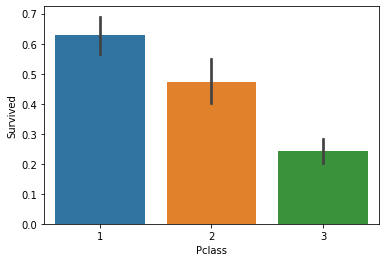

In [20]:
# making barplot to see the counts in p class and survived column
sns.barplot(x='Pclass', y='Survived', data=train_df)

##### Splitting data sets into train test values 

In [21]:
train_x_values = train_df.drop(['Survived'],axis=1).values.T
train_y_values = train_df["Survived"].values
test_x_values = test_df.values.T
test_y_values = test_y_values_df['Survived'].values


# just printing out the shapes of train and test data set
print(train_x_values.shape)
print(train_y_values.shape)
print(test_x_values.shape)
print(test_y_values.shape)

(7, 891)
(891,)
(7, 418)
(418,)


#### Making Multi-Layer Neural Networl 

In [22]:
# this function takes an array and returns sigmoid of that array
def sigmoid_function(array):
    return 1/(1+np.exp((-array)))

In [23]:
#this function return the cost function 
def cost_function(a,y_values):
    return (-(y_values * np.log(a) + (1 - y_values) * np.log(1 - a))).mean()

In [24]:
#this is our main function which is training our algorithm
#and will return the cost function variation and learned weights
def training_model(x_values, y_values):
    # number of data in each feature
    total        = len(train_x_values)
    
    #number of iterations we are going to perform
    iterations   = 20000
    
    #this is our learning rate by which data set is going to learn
    alpha        =  0.0001
    
    # a list to store cost function after each iteration
    costs        = []
    # weights for input to first layer   # here we have 4 neurons in first layer 
    weight_one   = np.random.rand(4, len(train_x_values)) * 0.01   

    # taking random weights for input to final/output layer
    weight_two   = np.random.rand(4)*0.01              
    bias_two     = np.random.rand(4,1)
    weight_three = np.random.rand(4)*0.01
    bias_three   = np.random.rand(1)
    
    #looping 
    for _ in range(iterations):
        ##              forward.......propagating                 ##
        # creating array like multiple linear regression for first layer neurons
        z_one           = weight_one.dot(x_values) 

        # creating neurons in first layer
        a_one           = sigmoid_function(z_one) 
        
        # creating array like multiple linear regression for  layer
        z_two           = weight_two.dot(a_one) + bias_two 

        # applying sigmoid function as activation function for neurons in second layer
        a_two           = sigmoid_function(z_two)
        
        # creating array like multiple linear regression for output/final layer
        z_three         = weight_three.dot(a_two) + bias_three
        
        # implementing sigmoid function find probablity of default category
        a_three         = sigmoid_function(z_three)
        
        # calculating cost at each iteration
        costs.append(cost_function(a_three,y_values))
        

        ##        backward..............propagating       ##
        # defining derivatives for 
        #error in third layer
        delta_Z3        = a_three - train_y_values
        
        # error in weights of third layer
        delta_W3        = delta_Z3.dot(a_two.T)/total 
        
        #error in bias of third layer     
        delta_bias_3    = delta_Z3.sum()/total 
        
        #error in second layer
        delta_Z2        = weight_three.dot(delta_Z3 * a_two * (1 - a_two))                     #  derivative of the sigmoid function

        # error in weights of second layer
        delta_W2        = (delta_Z2.dot(a_one.T))/ total
        
        #error in bias of second layer
        delta_bias_2    = delta_Z2.sum()/total

        #error in first layer
        delta_Z1        = weight_two.dot(delta_Z2 * a_one * (1 - a_one))           # element wise product (*)

        # error in weights of first layer
        delta_W1        = (delta_Z1.dot(x_values.T))/total  
        
        #adjusting weights and bias elements in each iteration
        weight_one      = weight_one    - alpha * delta_W1
        weight_two      = weight_two    - alpha * delta_W2
        weight_three    = weight_three  - alpha * delta_W3
        bias_two        = bias_two      - alpha * delta_bias_2
        bias_three      = bias_three    - alpha * delta_bias_3
        
    return weight_one ,weight_two, weight_three, bias_two, bias_three, costs,iterations

In [25]:
#obataining weights and bias after training model
weight_one, weight_two, weight_three, bias_two, bias_three,costs,iterations = training_model(train_x_values, train_y_values)

In [26]:
# observing weights of layer one
weight_one

array([[ 0.90459987, -3.20338918,  0.01377122,  0.4142568 ,  0.14328148,
        -0.02315728, -0.35006331],
       [ 0.90436773, -3.20877249,  0.01151209,  0.41351178,  0.1476129 ,
        -0.02263628, -0.35018019],
       [ 0.90095597, -3.20480513,  0.01163045,  0.41620625,  0.14747888,
        -0.02924163, -0.34152497],
       [ 0.90412782, -3.20755732,  0.01247822,  0.40925465,  0.1440278 ,
        -0.02991412, -0.34857042]])

In [27]:
# observing weights of layer two
weight_two

array([1.04730011, 1.04339429, 1.04733747, 1.05086966])

In [28]:
#  observing weights of layer three 
weight_three

array([-1.45680874, -1.53572843, -1.22765483, -0.88083582])

In [29]:
# bias of layer two
bias_two

array([[-2.41301053],
       [-2.51398825],
       [-2.14478824],
       [-1.79873039]])

In [30]:
# bias of layer three
bias_three

array([2.62766196])

##### Plotting cost function 

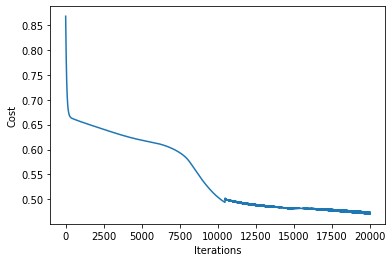

In [31]:
# plotting graph of cost function with respect to number of iterations
plt.plot(np.arange(iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

##### Predicting output based on obtained weights 

In [32]:
# defining function to predict the output based on adjusted weights with given data
def predict_output(x_values):
   # creating array like multiple linear regression for first layer neurons
    z_one = weight_one.dot(x_values) 

    # creating neurons in first layer
    a_one = sigmoid_function(z_one) 

    # creating array like multiple linear regression for output/final layer
    z_two = weight_two.dot(a_one) + bias_two

    # applying sigmoid function as activation function for neurons in second layer
    a_two = sigmoid_function(z_two)
        
    z_three = weight_three.dot(a_two) + bias_three
        
    # implementing sigmoid function find probablity of default category
    a_three = sigmoid_function(z_three)
    
    return a_three

In [33]:
#obtaining predicted values of train and test data sets seperately
train_predicted_values = predict_output(train_x_values)
test_predicted_values = predict_output(test_x_values)

##### calculating accuracy 

In [34]:
# categorising predicted values of logistic regression
def compare_outputs(y_values):
    return np.where(y_values >= 0.5, 1, 0)

In [35]:
# comparing the predicted and actual outputs abtained...
train_predicted_values = compare_outputs(train_predicted_values)
test_predicted_values  = compare_outputs(test_predicted_values)

In [36]:
# defining a function to check accuracy
def accuracy(predicted_values, actual_values):
    return (predicted_values == actual_values).mean()*100

In [37]:
# obatainig the accuracy of train set and printing its value
train_accuracy_percent = accuracy(train_predicted_values, train_y_values)
train_accuracy_percent

77.89001122334456

In [38]:
# obatainig the accuracy of test set and printing its value
test_accuracy_percent = accuracy(test_predicted_values, test_y_values)
test_accuracy_percent

88.75598086124403